In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch

In [13]:
#Importing the Data
#set 1: x=0, y=1 in data.csv
#set 2: x=2, y=3 in data.csv
#set 3: x=4, y=5 in data.csv
#set 4: x=6, y=7 in data.csv

data = pd.read_csv('data.csv')
xs = data.iloc[:, 2]
ys = data.iloc[:, 3] 

In [14]:
m=5 #polynomial degree(count the x^0 value as well)
n=len(ys) #number of examples
numIterations= 1000 #number of iterations
alpha = 0.001 #learning rate 

In [15]:
x = np.zeros(shape=(n, m))
theta = np.ones(m)

In [16]:
for i in range(0, n):
    for j in range(0, m):
        x[i][j] = np.power(xs[i], j)
print(x)

[[ 1.     -2.      4.     -8.     16.    ]
 [ 1.     -1.      1.     -1.      1.    ]
 [ 1.      0.9     0.81    0.729   0.6561]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      2.      4.      8.     16.    ]]


In [17]:
#define a gradient descent function
def gradientDescent(x, y, theta, alpha, n, numIterations):
    xTrans = x.transpose() #transposing x 
    for i in range(0, numIterations):
        
        yhat = np.dot(x, theta) #calculate the hypothesis
        
        loss = yhat - y #calculate the residuals 
        
        cost = np.sum(loss ** 2)  #solve for the sum of the residuals 
        
        
        #print("Iteration %d | Cost: %f" % (i, cost)) #this is here if i want to see the progression of loss per iteration
        
        gradient = np.dot(xTrans, loss) / n #why does this work??
        
        
        
        
        theta = theta - alpha * gradient #theta is the correction based upon our alpha and gradient values 
        print(cost)
    return theta

In [18]:
theta = gradientDescent(x, ys, theta, alpha, n, numIterations)
print(theta)

794.74794342
660.5628095494781
552.641203739847
465.61252091757063
395.217845135523
338.07908057311613
291.51606985578337
253.40172297140182
222.04725438223207
196.111268960228
174.5277387854736
156.44894367120602
141.20026477515293
128.24436738874263
117.15282126054967
107.58361256650588
99.26332303217296
91.97300628254625
85.5369931361509
79.81401727752414
74.69017925233342
70.0733669367398
65.88883000600754
62.07566879852838
58.58404777146238
55.37298319079986
52.408585944449825
49.66266511703121
47.11161756992148
44.73554429955492
42.517546648278106
40.44316518641594
38.49993180318512
36.67701165878895
34.96491649396627
33.35527463063226
31.840646037294135
30.414373241400163
29.070460778973434
27.803477383784738
26.608476316302706
25.480930181971218
24.41667734068337
23.411877605587875
22.46297540200157
21.566668931897503
20.719884186538653
19.91975288544719
19.163593606807375
18.44889552270815
17.77330427035097
17.13460958382596
16.530734385322187
15.959725093668938
15.41974295505

2.937724815867979
2.9328710820005934
2.9280255353513067
2.923188162079553
2.91835894836818
2.9135378804234096
2.908724944474799
2.9039201267751964
2.8991234136007136
2.894334791250668
2.889554246047561
2.884781764337029
2.880017332487808
2.8752609368916904
2.8705125639634925
2.8657722001410106
2.8610398318849803
2.8563154456790465
2.851599028029713
2.846890565466315
2.842190044540972
2.8374974518285523
2.832812773926636
2.8281359974554747
2.823467109057953
2.8188060953995526
2.8141529431683097
2.8095076390747815
2.804870169852004
2.80024052225546
2.7956186830630307
2.79100463907497
2.7863983771138585
2.7817998840245663
2.7772091466742226
2.772626151952164
2.7680508867699136
2.7634833380611328
2.7589234927815802
2.754371337909089
2.7498268604435165
2.7452900474067126
2.740760885842479
2.7362393628165385
2.731725465416489
2.727219180751774
2.722720495953643
2.7182293981751138
2.7137458745909364
2.709269912397555
2.704801498813074
2.7003406210772196
2.6958872664513023
2.6914414222181833
2

1.3969769555699607
1.3947198603088486
1.392466563793203
1.3902170596055667
1.3879713413393342
1.3857294025987392
1.3834912369988281
1.3812568381654486
1.3790261997352282
1.376799315355558
1.3745761786845705
1.3723567833911263
1.3701411231547926
1.3679291916658265
1.3657209826251582
1.3635164897443677
1.3613157067456738
1.359118627361913
1.3569252453365166
1.3547355544235036
1.3525495483874526
1.350367221003489
1.3481885660572672
1.3460135773449509
1.3438422486731942
1.34167457385913
1.3395105467303448
1.3373501611248655
[ 0.37307661  0.4602976   0.35131339 -0.07095985  0.1364267 ]


Text(0.5, 1.0, 'Least Squares By Gradient Descent')

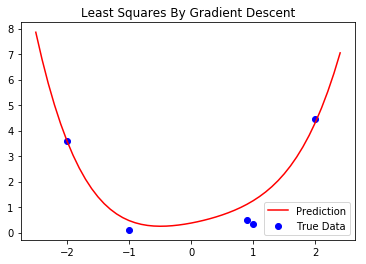

In [26]:
#PLOTTING
plt.scatter(xs,ys, color = 'blue',label = 'True Data')

plotx = np.arange(-2.5, 2.5, 0.1)
ploty = theta[0] + theta[1]*(plotx) + theta[2]*(plotx**2) + theta[3]*(plotx**3)+ theta[4]*(plotx**4)

plt.plot(plotx,ploty, color = 'red', label = 'Prediction')
plt.legend()
plt.title("Least Squares By Gradient Descent")

In [27]:
    #Starting the testing process
    testdata = pd.read_csv('valz.csv')
    testx = testdata.iloc[:, 1]
    testy = testdata.iloc[:, 2] 

In [28]:
yhat = theta[0] + theta[1]*(testx) + theta[2]*(testx**2) + theta[3]*(testx**3)+ theta[4]*(testx**4)
error = np.linalg.norm((testy-yhat))
print(error)

5.700721276736289
